In [1]:
import pandas as pd

import topdesk

FIGURES_DIRECTORY = "../figures"

## Ophalen gegevens

In [2]:
query = [
    "operatorGroup.name=='Expertteam - Networking'",
    "status=='secondLine'",
    "creationDate=ge=2020-01-01T00:00:00Z",
    "creationDate=le=2022-01-01T00:00:00Z",
    # "archived==false"
]

fields = [
    "timeSpent",
    "category.name",
    "subcategory.name",
    "creationDate",
    "briefDescription",
    "request"
]

results = topdesk.get_incidenten(query, fields)


## Data cleaning

In [3]:
df = pd.json_normalize(results).dropna().convert_dtypes()

df = df.loc[df['category.name'] == 'Netwerk']

## Totale tijd besteed aan incidenten per categorie

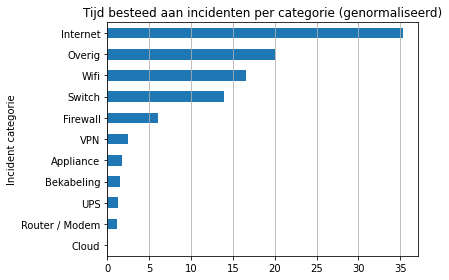

In [4]:
def normalize(s: pd.Series) -> pd.Series:
    return (s / s.sum()) * 100

plot = (
    df[['subcategory.name', 'timeSpent']]
    .groupby('subcategory.name')
    .sum()
    .apply(normalize)
    .sort_values(by='timeSpent', ascending=True)
    .plot(kind='barh', title='Tijd besteed aan incidenten per categorie (genormaliseerd)', xlabel='Incident categorie', legend=False)
)

plot.grid(axis='x')
fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/incidenten_tijd_categorie.pdf')

## Gemiddelde tijd besteed per categorie

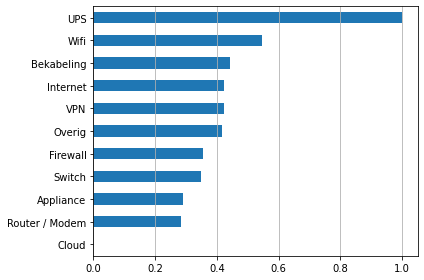

In [6]:
plot = (
    df[['subcategory.name', 'timeSpent']]
    .groupby('subcategory.name')
    .mean()
    .transform(normalize)
    .sort_values(by='timeSpent', ascending=True)
    .plot(kind='barh', legend=False, xlabel='')
)

plot.grid(axis='x')
fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/incidenten_tijd_gemiddeld_categorie.pdf')

## Aantal incidenten per categorie

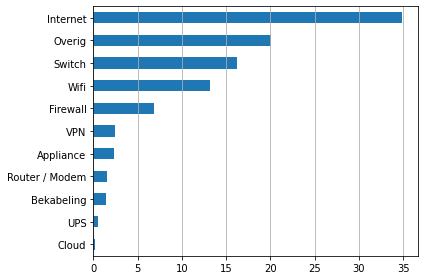

In [7]:
plot = (
    df['subcategory.name']
    .value_counts(normalize=True)
    .mul(100)
    .sort_values()
    .plot(kind='barh')
)

plot.grid(axis='x')
fig = plot.get_figure()
fig.tight_layout()
fig.savefig(f'{FIGURES_DIRECTORY}/incidenten_aantal_categorie.pdf')